In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io
from sklearn import svm
import os
import pandas as pd
import numpy as np
# from mat4py import loadmat
from sklearn import svm 
import time 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
X_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/X.npy")
X_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/X_test.npy")
Y_train = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/Y.npy")
Y_test = np.load("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/XDawn/Y_test.npy")
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5670, 528), (3780, 528), (5670,), (3780,))

# Linear SVM

In [4]:
mysvm = svm.LinearSVC()
mysvm.fit(X_train, Y_train)
predictedSVM = mysvm.predict(X_test)
[[tn, fp],[fn, tp]] = confusion_matrix(Y_test, predictedSVM)
accuracySVM = (tp+tn)/(tp+tn+fp+fn)
confusion_matrix(Y_test, predictedSVM), accuracySVM

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([[1779,  321],
        [ 410, 1270]]), 0.8066137566137566)

In [5]:
predictedSVM2 = mysvm.predict(X_train)
[[tn, fp],[fn, tp]] = confusion_matrix(Y_train, predictedSVM2)
accuracySVM2 = (tp+tn)/(tp+tn+fp+fn)
confusion_matrix(Y_train, predictedSVM2), accuracySVM2

(array([[2820,  330],
        [ 356, 2164]]), 0.8790123456790123)

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

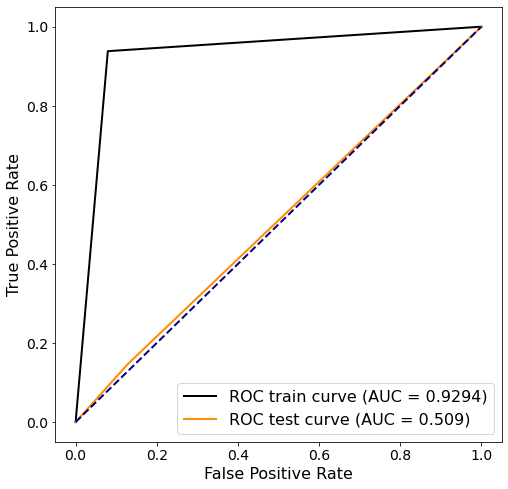

In [15]:
y_probs = mysvm.predict(X_test)
y_pred_train = mysvm.predict(X_train)
fpr_train, tpr_train, _ = roc_curve(Y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(Y_test, y_probs, pos_label=1)
#fpr_val, tpr_val, _ = roc_curve(ALS_Y, y_pred_val, pos_label=2)
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='black',
          lw=2,label=f"ROC train curve (AUC = {round(roc_auc_score(Y_train, y_pred_train), 4)})")
plt.plot(fpr_test, tpr_test, color='darkorange',
          lw=2,label=f"ROC test curve (AUC = {round(roc_auc_score(Y_test, y_probs), 4)})")
# plt.plot(fpr_val, tpr_val, color='red',
#           lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(f'ROC Plot for {model_name}', weight="bold", fontsize=20)
plt.legend(loc="lower right", fontsize=16)

# Default rbf kernel SVM

In [6]:
mysvm = svm.SVC()
mysvm.fit(X_train, Y_train)
predictedSVM = mysvm.predict(X_test)
[[tn, fp],[fn, tp]] = confusion_matrix(Y_test, predictedSVM)
accuracySVM = (tp+tn)/(tp+tn+fp+fn)
confusion_matrix(Y_test, predictedSVM), accuracySVM

(array([[1993,  107],
        [ 894,  786]]), 0.7351851851851852)

In [7]:
predictedSVM2 = mysvm.predict(X_train)
[[tn, fp],[fn, tp]] = confusion_matrix(Y_train, predictedSVM2)
accuracySVM2 = (tp+tn)/(tp+tn+fp+fn)
confusion_matrix(Y_train, predictedSVM2), accuracySVM2

(array([[3058,   92],
        [  36, 2484]]), 0.9774250440917107)

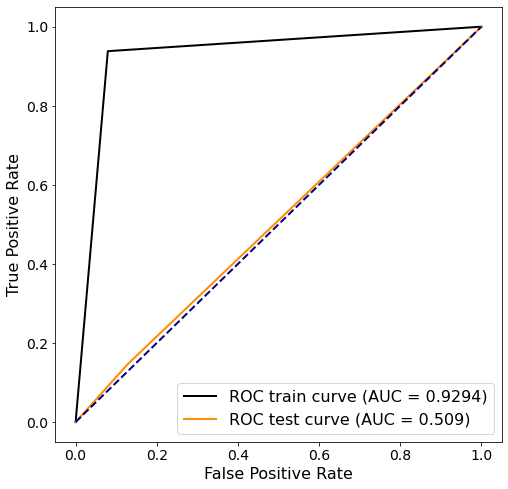

In [16]:
y_probs = mysvm.predict(X_test)
y_pred_train = mysvm.predict(X_train)
fpr_train, tpr_train, _ = roc_curve(Y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(Y_test, y_probs, pos_label=1)
#fpr_val, tpr_val, _ = roc_curve(ALS_Y, y_pred_val, pos_label=2)
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='black',
          lw=2,label=f"ROC train curve (AUC = {round(roc_auc_score(Y_train, y_pred_train), 4)})")
plt.plot(fpr_test, tpr_test, color='darkorange',
          lw=2,label=f"ROC test curve (AUC = {round(roc_auc_score(Y_test, y_probs), 4)})")
# plt.plot(fpr_val, tpr_val, color='red',
#           lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(f'ROC Plot for {model_name}', weight="bold", fontsize=20)
plt.legend(loc="lower right", fontsize=16)

#Polynomial degree 2 SVM

In [8]:
mysvm = svm.SVC(kernel='poly', degree=2)
mysvm.fit(X_train, Y_train)
predictedSVM = mysvm.predict(X_test)
[[tn, fp],[fn, tp]] = confusion_matrix(Y_test, predictedSVM)
accuracySVM = (tp+tn)/(tp+tn+fp+fn)
confusion_matrix(Y_test, predictedSVM), accuracySVM

(array([[1829,  271],
        [1433,  247]]), 0.5492063492063493)

In [9]:
predictedSVM2 = mysvm.predict(X_train)
[[tn, fp],[fn, tp]] = confusion_matrix(Y_train, predictedSVM2)
accuracySVM2 = (tp+tn)/(tp+tn+fp+fn)
confusion_matrix(Y_train, predictedSVM2), accuracySVM2

(array([[2900,  250],
        [ 156, 2364]]), 0.928395061728395)

#Polynomial, degree=5 SVM

In [ ]:
mysvm = svm.SVC(kernel='poly', degree=5)
mysvm.fit(X_train, Y_train)
predictedSVM = mysvm.predict(X_test)
[[tn, fp],[fn, tp]] = confusion_matrix(Y_test, predictedSVM)
accuracySVM = (tp+tn)/(tp+tn+fp+fn)
confusion_matrix(Y_test, predictedSVM), accuracySVM

(array([[2055,   45],
        [1546,  134]]), 0.5791005291005291)

In [ ]:
predictedSVM2 = mysvm.predict(X_train)
[[tn, fp],[fn, tp]] = confusion_matrix(Y_train, predictedSVM2)
accuracySVM2 = (tp+tn)/(tp+tn+fp+fn)
confusion_matrix(Y_train, predictedSVM2), accuracySVM2

(array([[3147,    3],
        [ 409, 2111]]), 0.927336860670194)

#SGD CLassifier

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

In [19]:
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
print(sgdc)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [20]:
 sgdc.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
score = sgdc.score(X_train, Y_train)
print("Training score: ", score) 

Training score:  0.8485008818342151


In [22]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ypred = sgdc.predict(X_test)
ypred_train = sgdc.predict(X_train)
cm = confusion_matrix(Y_test, ypred)
print(cm) 
print(confusion_matrix(Y_train,ypred_train))

[[1755  345]
 [ 445 1235]]
[[2795  355]
 [ 504 2016]]


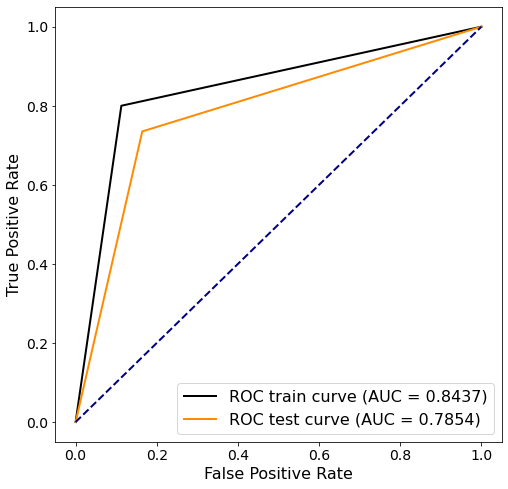

In [23]:
y_probs = sgdc.predict(X_test)
y_pred_train = sgdc.predict(X_train)
fpr_train, tpr_train, _ = roc_curve(Y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(Y_test, y_probs, pos_label=1)
#fpr_val, tpr_val, _ = roc_curve(ALS_Y, y_pred_val, pos_label=2)
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='black',
          lw=2,label=f"ROC train curve (AUC = {round(roc_auc_score(Y_train, y_pred_train), 4)})")
plt.plot(fpr_test, tpr_test, color='darkorange',
          lw=2,label=f"ROC test curve (AUC = {round(roc_auc_score(Y_test, y_probs), 4)})")
# plt.plot(fpr_val, tpr_val, color='red',
#           lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(f'ROC Plot for {model_name}', weight="bold", fontsize=20)
plt.legend(loc="lower right", fontsize=16)

#Grid Search + Ridge Classifier

In [24]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

In [27]:
# define grid search
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)

NameError: ignored

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
rc = RidgeClassifier(**grid_result.best_params_)
print(rc)

In [ ]:
rc.fit(X_train,Y_train)

In [ ]:
ypred = rc.predict(X_test)
ypred_train2= rc.predict(X_train)

In [ ]:
cm = confusion_matrix(Y_test, ypred)
print(cm)

In [ ]:
cm2 = confusion_matrix(Y_train, ypred_train2)
print(cm2)

In [ ]:
y_probs = rc.predict(X_test)
y_pred_train = rc.predict(X_train)
fpr_train, tpr_train, _ = roc_curve(Y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(Y_test, y_probs, pos_label=1)
#fpr_val, tpr_val, _ = roc_curve(ALS_Y, y_pred_val, pos_label=2)
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='black',
          lw=2,label=f"ROC train curve (AUC = {round(roc_auc_score(Y_train, y_pred_train), 4)})")
plt.plot(fpr_test, tpr_test, color='darkorange',
          lw=2,label=f"ROC test curve (AUC = {round(roc_auc_score(Y_test, y_probs), 4)})")
# plt.plot(fpr_val, tpr_val, color='red',
#           lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(f'ROC Plot for {model_name}', weight="bold", fontsize=20)
plt.legend(loc="lower right", fontsize=16)

#Bagging 


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy")

In [ ]:
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=30, bootstrap=True)

In [ ]:
bag_model=bag_model.fit(X_train,Y_train)

In [ ]:
ytest_pred=bag_model.predict(X_test)
ytrain_pred = bag_model.predict(X_train)
print(bag_model.score(X_test, Y_test), bag_model.score(X_train,Y_train))

0.7148148148148148 1.0


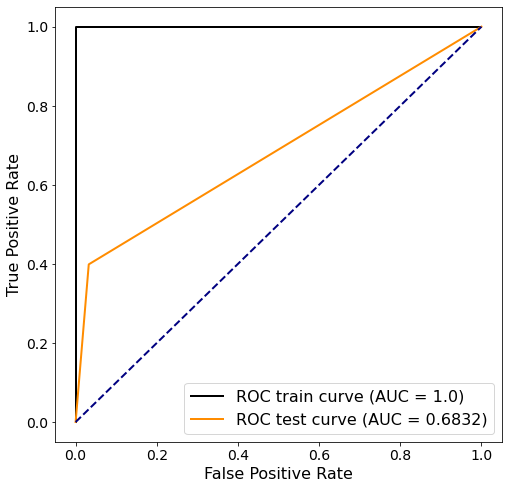

In [ ]:
y_probs = bag_model.predict(X_test)
y_pred_train = bag_model.predict(X_train)
fpr_train, tpr_train, _ = roc_curve(Y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(Y_test, y_probs, pos_label=1)
#fpr_val, tpr_val, _ = roc_curve(ALS_Y, y_pred_val, pos_label=2)
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='black',
          lw=2,label=f"ROC train curve (AUC = {round(roc_auc_score(Y_train, y_pred_train), 4)})")
plt.plot(fpr_test, tpr_test, color='darkorange',
          lw=2,label=f"ROC test curve (AUC = {round(roc_auc_score(Y_test, y_probs), 4)})")
# plt.plot(fpr_val, tpr_val, color='red',
#           lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(f'ROC Plot for {model_name}', weight="bold", fontsize=20)
plt.legend(loc="lower right", fontsize=16)